# WeatherPy Challenge
----


In [ ]:
!pip install citipy

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on 
# latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

In [3]:
cities

['vardo',
 'alberdi',
 'albany',
 'vaini',
 'tatarsk',
 'mataura',
 'khandyga',
 'manokwari',
 'klaksvik',
 'ribeira grande',
 'ushuaia',
 'taolanaro',
 'busselton',
 'labutta',
 'georgetown',
 'pisco',
 'xining',
 'sao filipe',
 'saint-augustin',
 'port elizabeth',
 'illoqqortoormiut',
 'punta arenas',
 'dingle',
 'rikitea',
 'caravelas',
 'ilhabela',
 'grand river south east',
 'coihaique',
 'manta',
 'bluff',
 'bredasdorp',
 'faanui',
 'bambous virieux',
 'barrow',
 'ust-ilimsk',
 'avarua',
 'bethel',
 'mercedes',
 'hithadhoo',
 'nanortalik',
 'ullapool',
 'hobart',
 'new norfolk',
 'kosh-agach',
 'tres arroyos',
 'severo-kurilsk',
 'huancabamba',
 'lensk',
 'puerto ayora',
 'ponta do sol',
 'campbeltown',
 'cape town',
 'belushya guba',
 'pingzhuang',
 'tinaquillo',
 'srandakan',
 'yunjinghong',
 'umzimvubu',
 'furano',
 'yulara',
 'ligayan',
 'tsihombe',
 'kavaratti',
 'east london',
 'pevek',
 'sentyabrskiy',
 'mahebourg',
 'marcona',
 'tuatapere',
 'thompson',
 'viedma',
 'kavie

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
# print(query_url)

In [5]:
# perform a weather check for each city
cityname = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
x = 1

print(f'Beginning Data Retrieval')

for city in cities:
    
    query_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
    weather_data = requests.get(query_url).json()
    
    try:        
        cityname.append(weather_data["name"])
        lat.append(weather_data["coord"]["lat"])
        long.append(weather_data["coord"]["lon"])
        maxtemp.append(weather_data["main"]["temp_max"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        windspeed.append(weather_data["wind"]["speed"])

        print(f'Processing city {x}, {city}')
        
        x = x + 1
    
    except KeyError:
        print(f'We cannot find city {city}...skipping.')
    
print(f'Data Retrieval Complete')

Beginning Data Retrieval
Processing city 1, vardo
Processing city 2, alberdi
Processing city 3, albany
Processing city 4, vaini
Processing city 5, tatarsk
Processing city 6, mataura
Processing city 7, khandyga
Processing city 8, manokwari
Processing city 9, klaksvik
Processing city 10, ribeira grande
Processing city 11, ushuaia
We cannot find city taolanaro...skipping.
Processing city 12, busselton
We cannot find city labutta...skipping.
Processing city 13, georgetown
Processing city 14, pisco
Processing city 15, xining
Processing city 16, sao filipe
Processing city 17, saint-augustin
Processing city 18, port elizabeth
We cannot find city illoqqortoormiut...skipping.
Processing city 19, punta arenas
Processing city 20, dingle
Processing city 21, rikitea
Processing city 22, caravelas
Processing city 23, ilhabela
We cannot find city grand river south east...skipping.
Processing city 24, coihaique
Processing city 25, manta
Processing city 26, bluff
Processing city 27, bredasdorp
Processin

Processing city 241, lanzhou
We cannot find city vaitupu...skipping.
Processing city 242, olafsvik
Processing city 243, hwange
Processing city 244, oktyabrskiy
Processing city 245, arraial do cabo
Processing city 246, east chicago
Processing city 247, zeya
Processing city 248, dwarka
Processing city 249, salalah
Processing city 250, aksarka
Processing city 251, bandarbeyla
Processing city 252, juegang
Processing city 253, wanning
Processing city 254, luderitz
Processing city 255, shimabara
Processing city 256, nome
Processing city 257, maldonado
Processing city 258, qui nhon
Processing city 259, gordeyevka
Processing city 260, waddan
Processing city 261, barra patuca
Processing city 262, jizan
Processing city 263, lagoa
Processing city 264, thaba-tseka
Processing city 265, belyy yar
Processing city 266, noumea
Processing city 267, santiago
Processing city 268, quiruvilca
Processing city 269, belmonte
We cannot find city falealupo...skipping.
Processing city 270, mahibadhoo
Processing c

Processing city 483, liepaja
Processing city 484, nouakchott
Processing city 485, mbini
Processing city 486, darhan
Processing city 487, taoudenni
Processing city 488, bullhead city
Processing city 489, kaifeng
Processing city 490, ketchikan
Processing city 491, pedernales
Processing city 492, villa bruzual
Processing city 493, mao
Processing city 494, adrar
Processing city 495, puerto quijarro
Processing city 496, katsuura
Processing city 497, liling
Processing city 498, nizhniy baskunchak
Processing city 499, lasa
Processing city 500, dukat
Processing city 501, yumen
Processing city 502, sept-iles
Processing city 503, kulykiv
Processing city 504, boa vista
Processing city 505, pontes e lacerda
Processing city 506, iqaluit
Processing city 507, lima
Processing city 508, mayo
Processing city 509, goderich
We cannot find city khonuu...skipping.
Processing city 510, jasper
Processing city 511, codrington
Processing city 512, maltahohe
Processing city 513, hami
Processing city 514, dawlata

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
CityWeather = pd.DataFrame(cityname)
CityWeather["City"] = cityname
CityWeather["Latitude"] = lat
CityWeather["Longitude"] = long
CityWeather["Max Temp (F)"] = maxtemp
CityWeather["Humidity (%)"] = humidity
CityWeather["Cloudiness (%)"] = cloudiness
CityWeather["Wind Speed (mph)"] = windspeed
CityWeather = CityWeather[["City","Latitude","Longitude","Max Temp (F)",
            "Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]]
CityWeather

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Vardø,70.3705,31.1107,57.24,71,38,8.88
1,Alberdi,-32.8899,-60.6906,79.92,46,0,3.44
2,Albany,42.6001,-73.9662,84.15,75,99,2.86
3,Vaini,-21.2000,-175.2000,71.76,73,75,8.05
4,Tatarsk,55.2190,75.9828,60.30,90,100,8.30
...,...,...,...,...,...,...,...
539,Turukhansk,65.8167,87.9833,58.91,71,36,2.39
540,Progreso,21.2833,-89.6667,93.31,69,21,18.03
541,Narrabri,-30.3167,149.7833,38.52,91,0,1.01
542,Beyneu,45.3167,55.2000,87.08,17,0,7.81


In [11]:
CityWeather.to_csv("CitiesWeather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data."
HOver100 = CityWeather.loc[CityWeather["Humidity (%)"]>100]
HOver100

# No cities with humidity over 100

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

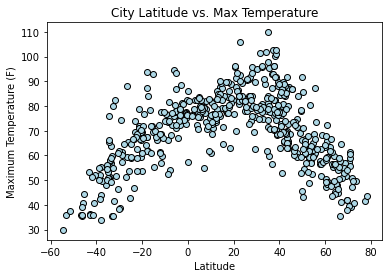

This plot shows the relationship between latitude and temperature. It shows that the maximum temperature increases as you get closer to the equator.


In [30]:
lat = CityWeather["Latitude"]
temp = CityWeather["Max Temp (F)"]

plt.scatter(lat,temp,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.show()

print("This plot shows the relationship between latitude and temperature. It shows that the maximum temperature increases as you get closer to the equator.")

## Latitude vs. Humidity Plot

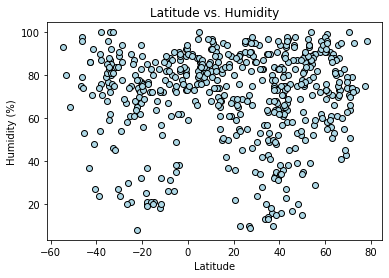

This plot shows the relationship between latitude and humidity. It seems that at most latitudes there can be a range of humidity, but at the equator, there is only high humidity.


In [31]:
hum = CityWeather["Humidity (%)"]

plt.scatter(lat,hum,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.show()

print("This plot shows the relationship between latitude and humidity. It seems that at most latitudes there can be a range of humidity, but at the equator, there is only high humidity.")

## Latitude vs. Cloudiness Plot

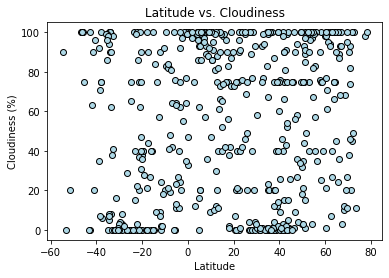

This plot shows the relationship between latitude and cloudiness. There is no pattern or correlation - latitude has no effect on cloudiness.


In [32]:
cloud = CityWeather["Cloudiness (%)"]

plt.scatter(lat,cloud,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.show()

print("This plot shows the relationship between latitude and cloudiness. There is no pattern or correlation - latitude has no effect on cloudiness.")

## Latitude vs. Wind Speed Plot

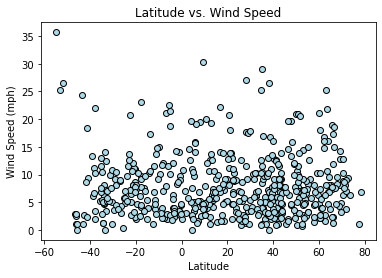

This plot shows the relationship between latitude and wind speed. There is no pattern or correlation - latitude has no effect on wind speed.


In [33]:
wind = CityWeather["Wind Speed (mph)"]

plt.scatter(lat,wind,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.show()

print("This plot shows the relationship between latitude and wind speed. There is no pattern or correlation - latitude has no effect on wind speed.")

## Linear Regression

In [ ]:
# run linear regression on each relationship
# first, separate the plots into hemispheres 
# North - greater than or equal to 0 degrees latitude
# South - less than 0 degrees latitude

In [23]:
NorthernHemisphere = CityWeather.loc[CityWeather["Latitude"]>=0]
NHlat = NorthernHemisphere["Latitude"]
NHtemp = NorthernHemisphere["Max Temp (F)"]
NHhum = NorthernHemisphere["Humidity (%)"]
NHcloud = NorthernHemisphere["Cloudiness (%)"]
NHwind = NorthernHemisphere["Wind Speed (mph)"]
NorthernHemisphere

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Vardø,70.3705,31.1107,57.24,71,38,8.88
2,Albany,42.6001,-73.9662,84.15,75,99,2.86
4,Tatarsk,55.2190,75.9828,60.30,90,100,8.30
6,Khandyga,62.6667,135.6000,60.89,56,7,1.59
8,Klaksvík,62.2266,-6.5890,63.52,91,94,16.80
...,...,...,...,...,...,...,...
537,Cayenne,4.9333,-52.3333,83.08,80,0,1.99
538,Tooele,40.5308,-112.2983,85.86,34,1,8.05
539,Turukhansk,65.8167,87.9833,58.91,71,36,2.39
540,Progreso,21.2833,-89.6667,93.31,69,21,18.03


In [24]:
SouthernHemisphere = CityWeather.loc[CityWeather["Latitude"]<0]
SHlat = SouthernHemisphere["Latitude"]
SHtemp = SouthernHemisphere["Max Temp (F)"]
SHhum = SouthernHemisphere["Humidity (%)"]
SHcloud = SouthernHemisphere["Cloudiness (%)"]
SHwind = SouthernHemisphere["Wind Speed (mph)"]
SouthernHemisphere

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Alberdi,-32.8899,-60.6906,79.92,46,0,3.44
3,Vaini,-21.2000,-175.2000,71.76,73,75,8.05
5,Mataura,-46.1927,168.8643,35.47,98,100,0.98
7,Manokwari,-0.8667,134.0833,77.49,81,99,3.15
10,Ushuaia,-54.8000,-68.3000,29.86,93,90,35.68
...,...,...,...,...,...,...,...
529,Inhambane,-23.8650,35.3833,66.52,85,0,5.21
533,Sananduva,-27.9497,-51.8067,64.47,69,2,3.80
535,Samarai,-10.6167,150.6667,77.43,86,92,14.72
541,Narrabri,-30.3167,149.7833,38.52,91,0,1.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value = -0.63.


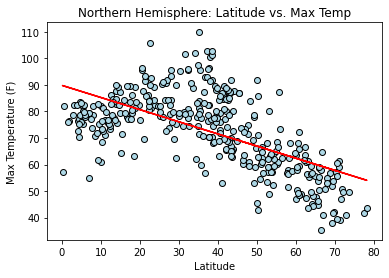

This plot and the r-value show that there is a moderate negative correlation between latitude and maximum temperature in the northern hemisphere. As you get further from the equator, maximum temperature decreases.


In [29]:
NHtemp_correlation = st.pearsonr(NHlat,NHtemp)
print(f"r-value = {round(NHtemp_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(NHlat,NHtemp)
regress_values = slope * NHlat + intercept

plt.scatter(NHlat,NHtemp,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(NHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere: Latitude vs. Max Temp")

plt.show()

print("This plot and the r-value show that there is a moderate negative correlation between latitude and maximum temperature in the northern hemisphere. As you get further from the equator, maximum temperature decreases.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value = 0.77.


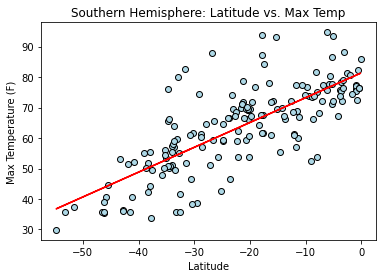

This plot and the r-value show that there is a strong positive correlation between latitude and maximum temperature in the southern hemisphere. As you get closer to the equator, maximum temperature increases.


In [35]:
SHtemp_correlation = st.pearsonr(SHlat,SHtemp)
print(f"r-value = {round(SHtemp_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(SHlat,SHtemp)
regress_values = slope * SHlat + intercept

plt.scatter(SHlat,SHtemp,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(SHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere: Latitude vs. Max Temp")

plt.show()

print("This plot and the r-value show that there is a strong positive correlation between latitude and maximum temperature in the southern hemisphere. As you get closer to the equator, maximum temperature increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value = -0.05.


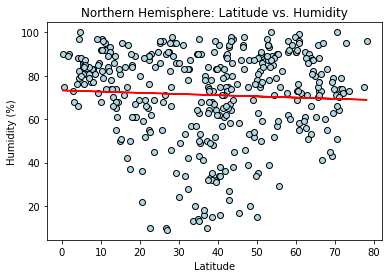

This plot and the r-value show that there is a no correlation between latitude and humidity in the northern hemisphere.


In [37]:
NHhum_correlation = st.pearsonr(NHlat,NHhum)
print(f"r-value = {round(NHhum_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(NHlat,NHhum)
regress_values = slope * NHlat + intercept

plt.scatter(NHlat,NHhum,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(NHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Latitude vs. Humidity")

plt.show()

print("This plot and the r-value show that there is a no correlation between latitude and humidity in the northern hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value = -0.08.


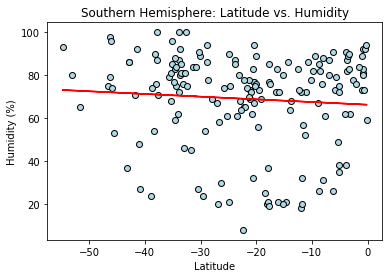

This plot and the r-value show that there is no correlation between latitude and humidity in the southern hemisphere.


In [39]:
SHhum_correlation = st.pearsonr(SHlat,SHhum)
print(f"r-value = {round(SHhum_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(SHlat,SHhum)
regress_values = slope * SHlat + intercept

plt.scatter(SHlat,SHhum,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(SHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Latitude vs. Humidity")

plt.show()

print("This plot and the r-value show that there is no correlation between latitude and humidity in the southern hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value = -0.02.


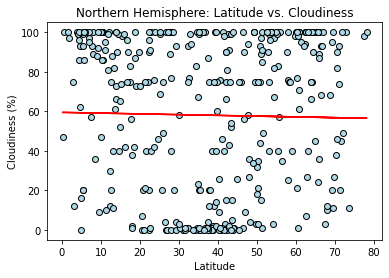

In [40]:
NHcloud_correlation = st.pearsonr(NHlat,NHcloud)
print(f"r-value = {round(NHcloud_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(NHlat,NHcloud)
regress_values = slope * NHlat + intercept

plt.scatter(NHlat,NHcloud,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(NHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")

plt.show()

print("This plot and the r-value show that there is no correlation between latitude and cloudiness in the northern hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value = 0.0.


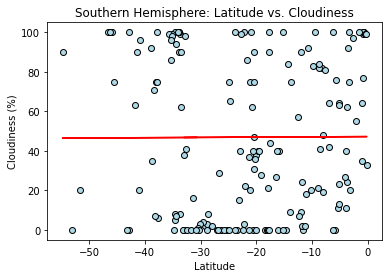

This plot and the r-value show that there is no correlation between latitude and cloudiness in the southern hemisphere.


In [42]:
SHcloud_correlation = st.pearsonr(SHlat,SHcloud)
print(f"r-value = {round(SHcloud_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(SHlat,SHcloud)
regress_values = slope * SHlat + intercept

plt.scatter(SHlat,SHcloud,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(SHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")

plt.show()

print("This plot and the r-value show that there is no correlation between latitude and cloudiness in the southern hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value = 0.02.


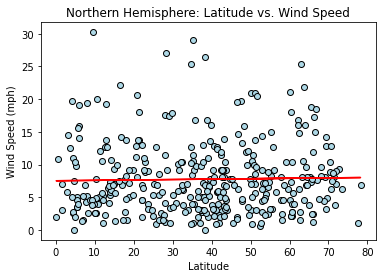

This plot and the r-value show that there is no correlation between latitude and wind speed in the northern hemisphere.


In [44]:
NHwind_correlation = st.pearsonr(NHlat,NHwind)
print(f"r-value = {round(NHwind_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(NHlat,NHwind)
regress_values = slope * NHlat + intercept

plt.scatter(NHlat,NHwind,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(NHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")

plt.show()

print("This plot and the r-value show that there is no correlation between latitude and wind speed in the northern hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value = -0.1.


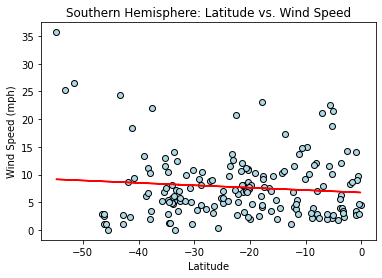

This plot and the r-value show that there is no correlation between latitude and wind speed in the southern hemisphere.


In [46]:
SHwind_correlation = st.pearsonr(SHlat,SHwind)
print(f"r-value = {round(SHwind_correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(SHlat,SHwind)
regress_values = slope * SHlat + intercept

plt.scatter(SHlat,SHwind,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(SHlat,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")

plt.show()

print("This plot and the r-value show that there is no correlation between latitude and wind speed in the southern hemisphere.")